In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv("BiggerCovidData.csv",parse_dates=['date'],dayfirst=True)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159781 entries, 0 to 159780
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    159781 non-null  object        
 1   continent                                   150189 non-null  object        
 2   location                                    159781 non-null  object        
 3   date                                        159781 non-null  datetime64[ns]
 4   total_cases                                 156906 non-null  float64       
 5   new_cases                                   156816 non-null  float64       
 6   new_cases_smoothed                          155665 non-null  float64       
 7   total_deaths                                139326 non-null  float64       
 8   new_deaths                                  139478 non-null  float64      

In [4]:
#data['DateMonth'] = data['date'].apply(lambda x: x[5:7])
data.groupby(['date']).describe()

total_cases                                                       \
                 count          mean           std  min       25%       50%   
date                                                                          
2020-01-01         0.0           NaN           NaN  NaN       NaN       NaN   
2020-01-02         0.0           NaN           NaN  NaN       NaN       NaN   
2020-01-03         0.0           NaN           NaN  NaN       NaN       NaN   
2020-01-04         0.0           NaN           NaN  NaN       NaN       NaN   
2020-01-05         0.0           NaN           NaN  NaN       NaN       NaN   
...                ...           ...           ...  ...       ...       ...   
2022-02-01       228.0  7.087136e+06  3.293114e+07  1.0  20893.75  222273.0   
2022-02-02       228.0  7.149048e+06  3.322069e+07  1.0  21363.00  222628.5   
2022-02-03       228.0  7.210161e+06  3.350413e+07  1.0  21442.50  223022.5   
2022-02-04       228.0  7.268094e+06  3.377509e+07  1.0  21745.50  223329.0   
2022-02-05       228.0  7.307870e+06  3.395795e+07  1.0  21774.00  223635.0   

                                    new_cases                ...  \
                   75%          max     count          mean  ...   
date                                                         ...   
2020-01-01         NaN          NaN       0.0           NaN  ...   
2020-01-02         NaN          NaN       0.0           NaN  ...   
2020-01-03         NaN          NaN       0.0           NaN  ...   
2020-01-04         NaN          NaN       0.0           NaN  ...   
2020-01-05         NaN          NaN       0.0           NaN  ...   
...                ...          ...       ...           ...  ...   
2022-02-01  1265478.25  381756438.0     223.0  66065.408072  ...   
2022-02-02  1280839.75  384944189.0     222.0  63585.175676  ...   
2022-02-03  1296875.25  388109962.0     218.0  63916.128440  ...   
2022-02-04  1314381.00  391129461.0     209.0  63199.708134  ...   
2022-02-05  1323944.25  393217243.0     185.0  51046.140541  ...   

           excess_mortality        excess_mortality_cumulative_per_million  \
                        75%    max                                   count   
date                                                                         
2020-01-01              NaN    NaN                                     0.0   
2020-01-02              NaN    NaN                                     0.0   
2020-01-03              NaN    NaN                                     0.0   
2020-01-04              NaN    NaN                                     0.0   
2020-01-05            9.835  13.52                                     2.0   
...                     ...    ...                                     ...   
2022-02-01              NaN    NaN                                     0.0   
2022-02-02              NaN    NaN                                     0.0   
2022-02-03              NaN    NaN                                     0.0   
2022-02-04              NaN    NaN                                     0.0   
2022-02-05              NaN    NaN                                     0.0   

                                                                        \
                mean       std       min       25%       50%       75%   
date                                                                     
2020-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-05  3.758374  7.534246 -1.569143  1.094616  3.758374  6.422132   
...              ...       ...       ...       ...       ...       ...   
2022-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN    

In [5]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.569060e+05,1.568160e+05,1.556650e+05,1.393260e+05,139478.000000,139348.000000,156176.000000,156086.000000,154940.000000,138609.000000,...,101997.000000,100533.000000,65882.000000,118939.000000,149141.000000,130996.000000,5.460000e+03,5460.000000,5460.000000,5460.000000
mean,2.317821e+06,1.059438e+04,1.042886e+04,5.526226e+04,170.625826,169.751194,26048.582830,145.596344,141.782614,483.448189,...,10.628208,32.769344,50.791893,3.027853,73.579680,0.725720,3.542025e+04,9.038700,15.862342,897.921980
std,1.386287e+07,7.838891e+04,7.494182e+04,2.899342e+05,831.066612,809.558719,43580.486756,606.887914,449.212619,753.252753,...,10.559579,13.517907,31.809730,2.451000,7.495752,0.149965,1.003999e+05,16.422811,30.428104,1350.138688
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-13876.282000,-1936.106000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.793000e+03,1.000000e+00,6.429000e+00,7.400000e+01,0.000000,0.143000,564.540250,0.033000,1.549000,17.166000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-1.002000e+02,-0.940000,-0.862500,-39.908950
50%,2.346300e+04,7.600000e+01,1.017140e+02,7.320000e+02,2.000000,2.429000,4332.005000,10.847500,17.474000,114.960000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.001850e+03,5.610000,7.055000,422.693140
75%,2.760505e+05,1.004000e+03,1.060571e+03,6.905750e+03,19.000000,20.286000,33629.692500,94.806750,110.303250,665.055000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.284565e+04,14.072500,22.657500,1527.289615
max,3.932172e+08,4.218944e+06,3.432553e+06,5.734396e+06,18057.000000,14705.714000,473136.489000,51427.491000,16032.222000,6201.877000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.600000,8505.587129


In [6]:
data.describe(include= ["object"])

,iso_code,continent,location,tests_units
count,159781,150189,159781,83410
unique,238,6,238,4
top,MEX,Africa,Mexico,tests performed
freq,767,37877,767,58980


In [7]:
data.groupby(['location']).describe(percentiles = [])

total_cases                                                  \
                        count          mean           std    min          50%   
location                                                                        
Afghanistan             713.0  7.543056e+04  5.613071e+04    5.0      55492.0   
Africa                  723.0  4.000962e+06  3.316613e+06    1.0    3692899.0   
Albania                 699.0  9.064238e+04  7.655153e+04    2.0     100246.0   
Algeria                 712.0  1.069888e+05  7.553971e+04    1.0     110802.5   
Andorra                 706.0  9.746479e+03  8.001708e+03    1.0      10596.5   
...                       ...           ...           ...    ...          ...   
Wallis and Futuna       475.0  3.107516e+02  2.042633e+02    1.0        454.0   
World                   746.0  1.165503e+08  1.031207e+08  557.0  102108035.5   
Yemen                   667.0  4.745138e+03  3.515627e+03    1.0       2586.0   
Zambia                  690.0  9.500723e+04  9.350674e+04    2.0      77405.0   
Zimbabwe                688.0  5.743710e+04  6.626099e+04    1.0      36051.0   

                               new_cases                                     \
                           max     count           mean            std  min   
location                                                                      
Afghanistan           165711.0     713.0     232.413745     397.424389 -6.0   
Africa              10963617.0     724.0   15117.446133   12468.965271  0.0   
Albania               263172.0     698.0     377.037249     477.201754  0.0   
Algeria               257598.0     712.0     361.794944     364.897712  0.0   
Andorra                36599.0     705.0      51.913475     161.117977  0.0   
...                        ...       ...            ...            ...  ...   
Wallis and Futuna        454.0     475.0       0.955789       4.504585  0.0   
World              393217243.0     746.0  525320.159517  611059.501277  0.0   
Yemen                  11149.0     667.0      16.715142      25.163724 -1.0   
Zambia                306777.0     689.0     445.249637     805.322197  0.0   
Zimbabwe              230402.0     688.0     334.886628     856.186631 -6.0   

                   ... excess_mortality                        \
                   ...              std    min    50%     max   
location           ...                                          
Afghanistan        ...              NaN    NaN    NaN     NaN   
Africa             ...              NaN    NaN    NaN     NaN   
Albania            ...        31.865738  -6.24  23.11  120.15   
Algeria            ...        35.065776  -0.61  22.03  110.72   
Andorra            ...        53.949342 -27.48  15.30  145.90   
...                ...              ...    ...    ...     ...   
Wallis and Futuna  ...              NaN    NaN    NaN     NaN   
World              ...              NaN    NaN    NaN     NaN   
Yemen              ...              NaN    NaN    NaN     NaN   
Zambia             ...              NaN    NaN    NaN     NaN   
Zimbabwe           ...              NaN    NaN    NaN     NaN   

                  excess_mortality_cumulative_per_million               \
                                                    count         mean   
location                                                                 
Afghanistan                                           0.0          NaN   
Africa                                                0.0          NaN   
Albania                                              20.0  1761.189084   
Algeria                                              11.0   428.837692   
Andorra                                              10.0   838.999922   
...                                                   ...          ...   
Wallis and Futuna                                     0.0          NaN   
World                                                 0.0          NaN   
Yemen                                              

In [8]:
data.groupby(["location"]).agg([np.mean, np.std, np.min, np.max])

total_cases                                    \
                           mean           std   amin         amax   
location                                                            
Afghanistan        7.543056e+04  5.613071e+04    5.0     165711.0   
Africa             4.000962e+06  3.316613e+06    1.0   10963617.0   
Albania            9.064238e+04  7.655153e+04    2.0     263172.0   
Algeria            1.069888e+05  7.553971e+04    1.0     257598.0   
Andorra            9.746479e+03  8.001708e+03    1.0      36599.0   
...                         ...           ...    ...          ...   
Wallis and Futuna  3.107516e+02  2.042633e+02    1.0        454.0   
World              1.165503e+08  1.031207e+08  557.0  393217243.0   
Yemen              4.745138e+03  3.515627e+03    1.0      11149.0   
Zambia             9.500723e+04  9.350674e+04    2.0     306777.0   
Zimbabwe           5.743710e+04  6.626099e+04    1.0     230402.0   

                       new_cases                                 \
                            mean            std amin       amax   
location                                                          
Afghanistan           232.413745     397.424389 -6.0     3243.0   
Africa              15117.446133   12468.965271  0.0    60523.0   
Albania               377.037249     477.201754  0.0     4789.0   
Algeria               361.794944     364.897712  0.0     2521.0   
Andorra                51.913475     161.117977  0.0     2313.0   
...                          ...            ...  ...        ...   
Wallis and Futuna       0.955789       4.504585  0.0       47.0   
World              525320.159517  611059.501277  0.0  4218944.0   
Yemen                  16.715142      25.163724 -1.0      236.0   
Zambia                445.249637     805.322197  0.0     5555.0   
Zimbabwe              334.886628     856.186631 -6.0     9185.0   

                  new_cases_smoothed                 ...  \
                                mean            std  ...   
location                                             ...   
Afghanistan               231.749980     373.370107  ...   
Africa                  15151.866496   11823.706753  ...   
Albania                   373.639449     409.776797  ...   
Algeria                   359.977970     354.846651  ...   
Andorra                    51.511666      92.638135  ...   
...                              ...            ...  ...   
Wallis and Futuna           0.964445       3.655393  ...   
World                  518050.324905  577005.318398  ...   
Yemen                      16.739089      21.590312  ...   
Zambia                    446.794893     750.787560  ...   
Zimbabwe                  336.690649     691.844037  ...   

                  excess_mortality_cumulative        excess_mortality  \
                                         amin   amax             mean   
location                                                                
Afghanistan                               NaN    NaN              NaN   
Africa                                    NaN    NaN              NaN   
Albania                                 -4.34  32.80        31.098500   
Algeria                                 -1.60  26.86        29.874545   
Andorra                                 16.84  46.81        31.525000   
...                                       ...    ...              ...   
Wallis and Futuna                         NaN    NaN              NaN   
World                                     NaN    NaN              NaN   
Yemen                                     NaN    NaN              NaN   
Zambia                                    NaN    NaN              NaN   
Zimbabwe                                  NaN    NaN              NaN   

                                             \
                         std   amin    amax   
location                                      
Afghanistan              NaN    NaN     NaN   
Africa                   NaN    NaN     NaN   
Albania        

In [9]:
pd.crosstab(data['tests_units'], data['location'])

location,Albania,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Zimbabwe
tests_units,,,,,,,,,,,,,,,,,,,,,
people tested,0,456,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,684,0,0,0
samples tested,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,719,0,0
tests performed,709,0,21,1,764,698,700,675,283,134,...,679,674,667,737,674,700,0,0,687,639
units unclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.pivot_table(
    ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests', 'total_tests', 'positive_rate', 'icu_patients'],
    ['location'],
    aggfunc="mean",
)

,icu_patients,new_cases,new_deaths,new_tests,positive_rate,total_cases,total_deaths,total_tests
location,,,,,,,,
Afghanistan,NaN,232.413745,10.839416,NaN,NaN,7.543056e+04,3.418044e+03,NaN
Africa,NaN,15117.446133,331.987569,NaN,NaN,4.000962e+06,1.035623e+05,NaN
Albania,NaN,377.037249,4.836442,2302.542522,0.160290,9.064238e+04,1.546485e+03,5.017330e+05
Algeria,30.66998,361.794944,9.540230,NaN,NaN,1.069888e+05,3.123218e+03,NaN
Andorra,NaN,51.913475,0.214286,NaN,0.107739,9.746479e+03,9.516327e+01,1.964666e+05
...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,0.955789,0.021739,NaN,NaN,3.107516e+02,6.652174e+00,NaN
World,NaN,525320.159517,7651.532172,NaN,NaN,1.165503e+08,2.468972e+06,NaN
Yemen,NaN,16.715142,3.131376,NaN,NaN,4.745138e+03,1.022748e+03,NaN


In [11]:
cols_for_cluster = [
                    "total_deaths", 
                    "stringency_index", 
                    "extreme_poverty", 
                    "cardiovasc_death_rate", 
                    "female_smokers", 
                    "male_smokers", 
                    "diabetes_prevalence", 
                    "population", 
                    "population_density", 
                    "gdp_per_capita", 
                    "human_development_index", 
                    "total_tests"
]
data_with_clusters = data[cols_for_cluster].copy()
data_with_clusters["Country"] = data["location"]
data_with_clusters.dropna(inplace = True, axis = 0, how = "any")

In [12]:
data_with_clusters.head()

,total_deaths,stringency_index,extreme_poverty,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,population,population_density,gdp_per_capita,human_development_index,total_tests,Country
1452,1.0,51.85,1.1,304.195,7.1,51.2,10.08,2872934.0,104.871,11803.431,0.795,157.0,Albania
1453,1.0,51.85,1.1,304.195,7.1,51.2,10.08,2872934.0,104.871,11803.431,0.795,298.0,Albania
1454,1.0,78.70,1.1,304.195,7.1,51.2,10.08,2872934.0,104.871,11803.431,0.795,457.0,Albania
1455,1.0,78.70,1.1,304.195,7.1,51.2,10.08,2872934.0,104.871,11803.431,0.795,505.0,Albania
1456,1.0,81.48,1.1,304.195,7.1,51.2,10.08,2872934.0,104.871,11803.431,0.795,532.0,Albania


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

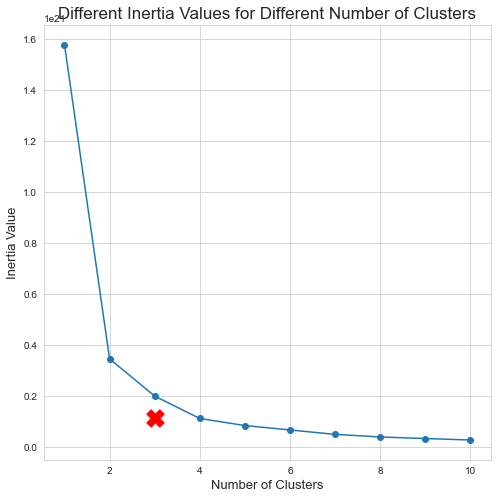

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(data_with_clusters[cols_for_cluster])
    inertia_list.append(kmeans_model.inertia_)
    
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(data_with_clusters[cols_for_cluster])
kmeans = KMeans(3)

identified_clusters = kmeans.fit_predict(pca_feat)
identified_clusters2 = kmeans.fit_predict(data_with_clusters[cols_for_cluster])

In [15]:
pca_feat = pd.DataFrame(pca_feat, columns = ['feat1', 'feat2'])
data_with_clusters['Clusters'] = identified_clusters2

In [16]:
pca_feat['Clusters'] = identified_clusters 

In [17]:
pca_feat

,feat1,feat2,Clusters
0,-6.183344e+07,-5.768547e+06,2
1,-6.183341e+07,-5.768410e+06,2
2,-6.183337e+07,-5.768256e+06,2
3,-6.183336e+07,-5.768209e+06,2
4,-6.183335e+07,-5.768183e+06,2
...,...,...,...
43142,-4.952852e+07,-6.895243e+06,2
43143,-4.952759e+07,-6.891473e+06,2
43144,-4.952675e+07,-6.888015e+06,2
43145,-4.952614e+07,-6.885541e+06,2


In [18]:
df1 = pca_feat[pca_feat.Clusters==0]
df2 = pca_feat[pca_feat.Clusters==1]
df3 = pca_feat[pca_feat.Clusters==2]

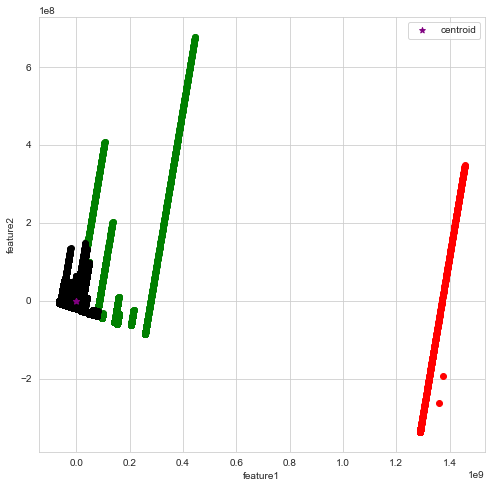

In [19]:
plt.scatter(df1.feat1, df1.feat2,color = 'green')
plt.scatter(df2.feat1, df2.feat2,color = 'red')
plt.scatter(df3.feat1, df3.feat2,color = 'black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()

In [20]:
df4 = data_with_clusters[data_with_clusters.Clusters==0]
df5 = data_with_clusters[data_with_clusters.Clusters==1]
df6 = data_with_clusters[data_with_clusters.Clusters==2]

No handles with labels found to put in legend.


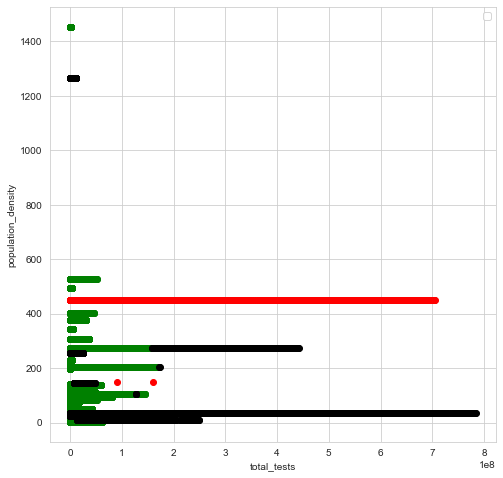

In [21]:
plt.scatter(df4.total_tests, df4.population_density,color = 'green')
plt.scatter(df5.total_tests, df5.population_density,color = 'red')
plt.scatter(df6.total_tests, df6.population_density,color = 'black')
plt.xlabel('total_tests')
plt.ylabel('population_density')
plt.legend()

In [22]:
pd.crosstab(data_with_clusters['Clusters'], data_with_clusters['Country']).T

Clusters,0,1,2
Country,,,
Albania,660,0,0
Argentina,688,0,0
Australia,700,0,0
Austria,669,0,0
Bangladesh,0,0,675
...,...,...,...
United States,0,0,700
Uruguay,661,0,0
Vietnam,184,0,0


In [23]:
df1 = data_with_clusters[data_with_clusters.Clusters==0]
df2 = data_with_clusters[data_with_clusters.Clusters==1]
df3 = data_with_clusters[data_with_clusters.Clusters==2]

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
data.isna().mean()

iso_code                                   0.000000
continent                                  0.060032
location                                   0.000000
date                                       0.000000
total_cases                                0.017993
                                             ...   
human_development_index                    0.180153
excess_mortality_cumulative_absolute       0.965828
excess_mortality_cumulative                0.965828
excess_mortality                           0.965828
excess_mortality_cumulative_per_million    0.965828
Length: 67, dtype: float64

In [26]:
data.dropna(inplace = True, axis = 1, thresh = 0.60*len(data))

In [27]:
data.isna().mean()

iso_code                           0.000000
continent                          0.060032
location                           0.000000
date                               0.000000
total_cases                        0.017993
new_cases                          0.018557
new_cases_smoothed                 0.025760
total_deaths                       0.128019
new_deaths                         0.127068
new_deaths_smoothed                0.127881
total_cases_per_million            0.022562
new_cases_per_million              0.023125
new_cases_smoothed_per_million     0.030298
total_deaths_per_million           0.132506
new_deaths_per_million             0.131555
new_deaths_smoothed_per_million    0.132369
reproduction_rate                  0.244553
stringency_index                   0.218587
population                         0.006553
population_density                 0.109888
median_age                         0.170452
aged_65_older                      0.179452
aged_70_older                   

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159781 entries, 0 to 159780
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         159781 non-null  object        
 1   continent                        150189 non-null  object        
 2   location                         159781 non-null  object        
 3   date                             159781 non-null  datetime64[ns]
 4   total_cases                      156906 non-null  float64       
 5   new_cases                        156816 non-null  float64       
 6   new_cases_smoothed               155665 non-null  float64       
 7   total_deaths                     139326 non-null  float64       
 8   new_deaths                       139478 non-null  float64       
 9   new_deaths_smoothed              139348 non-null  float64       
 10  total_cases_per_million          156176 non-

In [29]:
data = data[data.new_cases.notna()]

In [30]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159776,ZWE,Africa,Zimbabwe,2022-02-01,229851.0,185.0,153.571,5350.0,12.0,4.857,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
159777,ZWE,Africa,Zimbabwe,2022-02-02,230012.0,161.0,152.714,5352.0,2.0,4.429,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
159778,ZWE,Africa,Zimbabwe,2022-02-03,230170.0,158.0,153.429,5357.0,5.0,4.714,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
159779,ZWE,Africa,Zimbabwe,2022-02-04,230170.0,0.0,119.571,5357.0,0.0,3.429,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [31]:
data.reset_index(inplace = True, drop = True)

In [32]:
target = ['new_cases']

In [33]:
X = list(set(data.columns) - set(target) - set(['date', 'date', 'date', 'iso_code']))

In [34]:
X = data[X]

In [35]:
X = pd.get_dummies(X, columns = ['continent', 'location'])

In [36]:
X

,new_deaths_smoothed_per_million,human_development_index,new_cases_smoothed,total_deaths_per_million,reproduction_rate,hospital_beds_per_thousand,new_cases_smoothed_per_million,female_smokers,median_age,new_deaths_smoothed,...,location_Uzbekistan,location_Vanuatu,location_Vatican,location_Venezuela,location_Vietnam,location_Wallis and Futuna,location_World,location_Yemen,location_Zambia,location_Zimbabwe
0,NaN,0.511,NaN,NaN,NaN,0.5,NaN,NaN,18.6,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0.511,NaN,NaN,NaN,0.5,NaN,NaN,18.6,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0.511,NaN,NaN,NaN,0.5,NaN,NaN,18.6,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0.511,NaN,NaN,NaN,0.5,NaN,NaN,18.6,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0.511,NaN,NaN,NaN,0.5,NaN,NaN,18.6,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156811,0.322,0.571,153.571,354.488,0.52,1.7,10.176,1.6,19.6,4.857,...,0,0,0,0,0,0,0,0,0,1
156812,0.293,0.571,152.714,354.621,0.51,1.7,10.119,1.6,19.6,4.429,...,0,0,0,0,0,0,0,0,0,1
156813,0.312,0.571,153.429,354.952,0.51,1.7,10.166,1.6,19.6,4.714,...,0,0,0,0,0,0,0,0,0,1
156814,0.227,0.571,119.571,354.952,NaN,1.7,7.923,1.6,19.6,3.429,...,0,0,0,0,0,0,0,0,0,1


In [37]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(np.nan_to_num(X), data[target])

C:\Users\admin\AppData\Local\Temp/ipykernel_13896/196827338.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(np.nan_to_num(X), data[target])


RandomForestRegressor(max_depth=2, random_state=0)

In [38]:
preds = regr.predict(np.nan_to_num(X))

In [39]:
preds

array([3291.77643202, 3291.77643202, 3291.77643202, ..., 3291.77643202,
       3291.77643202, 3291.77643202])